In [641]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import scipy.stats as stats



In [642]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

In [643]:
ibm = pd.read_excel("IBM Employee Attrition.xlsx")
ibm.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [644]:
ibm.shape

(1470, 30)

In [645]:
ibm.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [646]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [647]:
ibm['Job Title'] = ibm['JobRole']
ibm['MilesFromHome'] = ibm['DistanceFromHome']
ibm['Satisfisfaction with Coworkers'] = ibm['RelationshipSatisfaction']
ibm["BusinessTravel"].replace(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], ["Rarely", "Frequently", 'Other'], inplace = True)
ibm["Satisfisfaction with Coworkers"].replace([1, 2, 3, 4], ["low", "medium", "high", "very high"], inplace = True)
ibm["WorkLifeBalance"].replace([1, 2, 3, 4], ["bad", "good", "better", "best"], inplace = True)
ibm["Education"].replace([1, 2, 3, 4, 5], ["No College", "Some College", "Bachelors", "Masters", "Doctorate"], inplace = True)
ibm["JobSatisfaction"].replace([1, 2, 3, 4], ["low", "medium", "high", "very high"], inplace = True)
ibm['JobInvolvement'].replace([1, 2, 3, 4], ["low", "medium", "high", "very high"], inplace = True)
ibm.drop(columns = ['DistanceFromHome', 'EnvironmentSatisfaction', 'JobRole', 'Over18', 'RelationshipSatisfaction', 'PerformanceRating'], inplace = True)

ibm.head()

,Age,Attrition,BusinessTravel,Department,Education,EducationField,EmployeeNumber,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Job Title,MilesFromHome,Satisfisfaction with Coworkers
0,41,Yes,Rarely,Sales,Some College,Life Sciences,1,Female,high,2,very high,Single,5993,8,Yes,11,0,8,0,bad,6,4,0,5,Sales Executive,1,low
1,49,No,Frequently,Research & Development,No College,Life Sciences,2,Male,medium,2,medium,Married,5130,1,No,23,1,10,3,better,10,7,1,7,Research Scientist,8,very high
2,37,Yes,Rarely,Research & Development,Some College,Other,4,Male,medium,1,high,Single,2090,6,Yes,15,0,7,3,better,0,0,0,0,Laboratory Technician,2,medium
3,33,No,Frequently,Research & Development,Masters,Life Sciences,5,Female,high,1,high,Married,2909,1,Yes,11,0,8,3,better,8,7,3,0,Research Scientist,3,high
4,27,No,Rarely,Research & Development,No College,Medical,7,Male,high,1,medium,Married,3468,9,No,12,1,6,3,better,2,2,2,2,Laboratory Technician,2,very high


In [648]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             1470 non-null   int64 
 1   Attrition                       1470 non-null   object
 2   BusinessTravel                  1470 non-null   object
 3   Department                      1470 non-null   object
 4   Education                       1470 non-null   object
 5   EducationField                  1470 non-null   object
 6   EmployeeNumber                  1470 non-null   int64 
 7   Gender                          1470 non-null   object
 8   JobInvolvement                  1470 non-null   object
 9   JobLevel                        1470 non-null   int64 
 10  JobSatisfaction                 1470 non-null   object
 11  MaritalStatus                   1470 non-null   object
 12  MonthlyIncome                   1470 non-null   

In [649]:
ibm2 = ibm.copy()
print(ibm2.shape)

(1470, 27)


In [650]:
ibm2["zscore_Age"] = np.abs(stats.zscore(ibm2["Age"]))

In [651]:
z_outliers = ibm2.loc[ibm2["zscore_Age"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [652]:
ibm2["zscore_EmployeeNumber"] = np.abs(stats.zscore(ibm2["EmployeeNumber"]))

In [653]:
z_outliers = ibm2.loc[ibm2["zscore_EmployeeNumber"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [654]:
ibm2["zscore_JobLevel"] = np.abs(stats.zscore(ibm2["JobLevel"]))

In [655]:
z_outliers = ibm2.loc[ibm2["zscore_JobLevel"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [656]:
ibm2["zscore_MonthlyIncome"] = np.abs(stats.zscore(ibm2["MonthlyIncome"]))

In [657]:
z_outliers = ibm2.loc[ibm2["zscore_MonthlyIncome"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [658]:
ibm2["zscore_NumCompaniesWorked"] = np.abs(stats.zscore(ibm2["NumCompaniesWorked"]))

In [659]:
z_outliers = ibm2.loc[ibm2["zscore_NumCompaniesWorked"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [660]:
ibm2["zscore_PercentSalaryHike"] = np.abs(stats.zscore(ibm2["PercentSalaryHike"]))

In [661]:
z_outliers = ibm2.loc[ibm2["zscore_PercentSalaryHike"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [662]:
ibm2["zscore_StockOptionLevel"] = np.abs(stats.zscore(ibm2["StockOptionLevel"]))

In [663]:
z_outliers = ibm2.loc[ibm2["zscore_StockOptionLevel"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [664]:
ibm2["zscore_TotalWorkingYears"] = np.abs(stats.zscore(ibm2["TotalWorkingYears"]))

In [665]:
z_outliers = ibm2.loc[ibm2["zscore_TotalWorkingYears"] > 3].index

print(z_outliers)

Int64Index([  85,   98,  126,  187,  270,  401,  445,  595,  624,  894,  956,
            1043, 1116, 1184, 1301, 1401],
           dtype='int64')


In [666]:
ibm2 = ibm2.drop(z_outliers)
print(ibm2.shape)

(1454, 35)


In [667]:
ibm2 = ibm2.reset_index(drop = True)

In [668]:
ibm2["zscore_TrainingTimesLastYear"] = np.abs(stats.zscore(ibm2["TrainingTimesLastYear"]))

In [669]:
z_outliers = ibm2.loc[ibm2["zscore_TrainingTimesLastYear"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [670]:
ibm2["zscore_YearsAtCompany"] = np.abs(stats.zscore(ibm2["YearsAtCompany"]))

In [671]:
z_outliers = ibm2.loc[ibm2["zscore_YearsAtCompany"] > 3].index

print(z_outliers)

Int64Index([  18,   62,  117,  186,  233,  385,  405,  419,  466,  470,  554,
             585,  644,  668,  740,  852,  904,  908,  912,  951, 1074, 1099,
            1122, 1125],
           dtype='int64')


In [672]:
ibm2 = ibm2.drop(z_outliers)
print(ibm2.shape)

(1430, 37)


In [673]:
ibm2 = ibm2.reset_index(drop = True)

In [674]:
ibm2["zscore_YearsInCurrentRole"] = np.abs(stats.zscore(ibm2["YearsInCurrentRole"]))

In [675]:
z_outliers = ibm2.loc[ibm2["zscore_YearsInCurrentRole"] > 3].index

print(z_outliers)

Int64Index([  44,   61,  118,  223,  271,  404,  451,  693,  723,  945,  993,
            1113, 1119, 1183, 1288, 1312, 1390],
           dtype='int64')


In [676]:
ibm2 = ibm2.drop(z_outliers)
print(ibm2.shape)

(1413, 38)


In [677]:
ibm2 = ibm2.reset_index(drop = True)

In [678]:
print(ibm2.shape)

(1413, 38)


In [679]:
ibm2["zscore_YearsSinceLastPromotion"] = np.abs(stats.zscore(ibm2["YearsSinceLastPromotion"]))

In [680]:
z_outliers = ibm2.loc[ibm2["zscore_YearsSinceLastPromotion"] > 3].index

print(z_outliers)

Int64Index([  60,   85,  104,  169,  183,  207,  238,  299,  304,  311,  371,
             407,  484,  502,  511,  520,  559,  665,  671,  707,  717,  719,
             752,  766,  780,  805,  841,  888,  899,  913,  937,  967, 1035,
            1049, 1171, 1190, 1243, 1250, 1277, 1294, 1347, 1358, 1390],
           dtype='int64')


In [681]:
ibm2 = ibm2.drop(z_outliers)
print(ibm2.shape)

(1370, 39)


In [682]:
ibm2 = ibm2.reset_index(drop = True)

In [683]:
ibm2["zscore_YearsWithCurrManager"] = np.abs(stats.zscore(ibm2["YearsWithCurrManager"]))

In [684]:
z_outliers = ibm2.loc[ibm2["zscore_YearsWithCurrManager"] > 3].index

print(z_outliers)

Int64Index([27, 141, 572, 590, 639, 1238, 1344], dtype='int64')


In [685]:
ibm2 = ibm2.drop(z_outliers)
print(ibm2.shape)

(1363, 40)


In [686]:
ibm2 = ibm2.reset_index(drop = True)

In [687]:
ibm2["zscore_MilesFromHome"] = np.abs(stats.zscore(ibm2["MilesFromHome"]))

In [688]:
z_outliers = ibm2.loc[ibm2["zscore_MilesFromHome"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [689]:
ibm2.describe()

,Age,EmployeeNumber,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MilesFromHome,zscore_Age,zscore_EmployeeNumber,zscore_JobLevel,zscore_MonthlyIncome,zscore_NumCompaniesWorked,zscore_PercentSalaryHike,zscore_StockOptionLevel,zscore_TotalWorkingYears,zscore_TrainingTimesLastYear,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsSinceLastPromotion,zscore_YearsWithCurrManager,zscore_MilesFromHome
count,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.0000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000
mean,36.184886,1027.871607,1.930301,5921.322084,2.680117,15.2135,0.797506,10.122524,2.806310,5.885547,3.785767,1.653705,3.702128,9.194424,0.792006,0.868923,0.685511,0.701484,0.824479,0.825133,0.804301,0.687932,0.760437,0.621932,0.782010,0.632497,0.829882,0.811281
std,8.881063,602.256226,0.996462,4164.674682,2.496772,3.6091,0.855196,6.594871,1.292945,4.382932,3.173107,2.292897,3.179766,8.088056,0.569702,0.495879,0.596012,0.553080,0.565201,0.540121,0.600552,0.517143,0.658879,0.441806,0.446055,0.481708,0.499362,0.584871
min,18.000000,1.000000,1.000000,1009.000000,0.000000,11.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.008343,0.000224,0.057788,0.000198,0.122861,0.057267,0.241988,0.035946,0.151498,0.019848,0.029817,0.004372,0.072264,0.024047
25%,30.000000,491.500000,1.000000,2824.000000,1.000000,12.0000,0.000000,6.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.320163,0.434516,0.057788,0.330921,0.523316,0.330589,0.241988,0.293077,0.151498,0.319664,0.594554,0.338836,0.536978,0.347006
50%,35.000000,1024.000000,2.000000,4682.000000,2.000000,14.0000,1.000000,9.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000,0.665354,0.887085,0.845911,0.652295,0.678049,0.762698,0.932014,0.606882,0.626869,0.529116,0.817290,0.682043,0.841599,0.841744
75%,42.000000,1559.000000,2.000000,6983.500000,4.000000,18.0000,1.000000,13.000000,3.000000,9.000000,7.000000,2.000000,7.000000,14.000000,1.103362,1.287761,0.961486,0.878691,1.078504,1.150554,0.932014,0.935905,0.929864,0.828933,1.159292,0.682043,1.146220,1.013523
max,60.000000,2068.000000,5.000000,19943.000000,9.000000,25.0000,3.000000,34.000000,6.000000,24.000000,14.000000,10.000000,13.000000,29.000000,2.526886,1.733302,2.653309,2.855728,2.525591,2.675949,2.589994,2.921061,2.486596,2.905701,2.793871,2.750034,2.813852,2.449642


In [690]:
ibm2["MonthlyIncome"].groupby(ibm2["BusinessTravel"]).mean()

#People that travel frequently aren't paid as well as those that don't.
#Frequent travel a factor in attrition?

BusinessTravel
Frequently    5591.259690
Other         5746.407143
Rarely        6034.943005
Name: MonthlyIncome, dtype: float64

In [691]:
pd.crosstab(ibm2["Attrition"],ibm2["BusinessTravel"], margins=False, normalize=False)

#not sure if this shows any causation actually

BusinessTravel,Frequently,Other,Rarely
Attrition,,,
No,192,128,816
Yes,66,12,149


In [693]:
ibm2["MonthlyIncome"].groupby(ibm2["Attrition"]).mean()

#People that leave the company have a lower monthly income than those that stay.
#Pay obviously a factor. We'll see with more analysis if it's the most important one

Attrition
No     6221.437500
Yes    4419.422907
Name: MonthlyIncome, dtype: float64

In [694]:
ibm2["MonthlyIncome"].groupby(ibm2["Gender"]).mean()

#Females make more than males. Interesting because typically the opposite is true.

Gender
Female    6168.023985
Male      5758.456760
Name: MonthlyIncome, dtype: float64

In [695]:
ibm2["YearsAtCompany"].groupby(ibm2["Job Title"]).mean()

#Sales reps don't stay very long compared to other jobs

Job Title
Healthcare Representative    6.724138
Human Resources              5.326923
Laboratory Technician        4.740157
Manager                      8.645161
Manufacturing Director       7.000000
Research Director            8.015873
Research Scientist           4.982699
Sales Executive              6.771242
Sales Representative         2.915663
Name: YearsAtCompany, dtype: float64

In [696]:
ibm2["YearsSinceLastPromotion"].groupby(ibm2["Attrition"]).mean()

#Not much variation here to show any meaningful direct correlation.

Attrition
No     1.678697
Yes    1.528634
Name: YearsSinceLastPromotion, dtype: float64

In [697]:
ibm2["PercentSalaryHike"].groupby(ibm2["Attrition"]).mean()

#Not much here either.

Attrition
No     15.216549
Yes    15.198238
Name: PercentSalaryHike, dtype: float64

In [698]:
ibm2["MilesFromHome"].groupby(ibm2["Attrition"]).mean()

#People that left the company were farther from home than those that stayed.
#commute may have been a factor.

Attrition
No      8.884683
Yes    10.744493
Name: MilesFromHome, dtype: float64

In [699]:
ibm2["YearsInCurrentRole"].groupby(ibm2["Attrition"]).mean()

#People that stayed were longer in their current roles than those that left.
#maybe the people that left were ceilinged and had no opportunity for advancement.

Attrition
No     4.021127
Yes    2.607930
Name: YearsInCurrentRole, dtype: float64

In [700]:
ibm2["JobLevel"].groupby(ibm2["Attrition"]).mean()

#People that stayed were higher level than those that left. 
#Also makes sense. Maybe they didn't sense opportunity for growth/ advancement

Attrition
No     2.007042
Yes    1.546256
Name: JobLevel, dtype: float64

In [701]:
pd.crosstab(ibm2["MaritalStatus"],ibm2["Attrition"], margins=False, normalize=False)

#Single people left at a higher rate than those that stayed.
#Maybe a better compensation package or better benefits would cause people to stay
#Or maybe benefits are part of reason why people stay.

Attrition,No,Yes
MaritalStatus,,
Divorced,267,32
Married,544,78
Single,325,117


In [702]:
ibm2["Age"].groupby(ibm2["Attrition"]).mean()

#Based on the above it would seem that there are other factors that were more apt to cause people to leave
#you would assume the average age of single people in the company is lower than married/divorced.

Attrition
No     36.811620
Yes    33.048458
Name: Age, dtype: float64

In [703]:
pd.crosstab(ibm2["Satisfisfaction with Coworkers"],ibm2["Attrition"], margins=False, normalize=False)

#This doesn't seem to show us much.
#those with high/very high satisfaction with coworkers left at about the same rate they stayed.

Attrition,No,Yes
Satisfisfaction with Coworkers,,
high,363,68
low,202,57
medium,240,43
very high,331,59


In [704]:
ibm2["YearsInCurrentRole"].groupby(ibm2["Attrition"]).mean()

#If people leave looks like it's after a short stay.
#that stands to reason. don't know if there is causality there tho.

Attrition
No     4.021127
Yes    2.607930
Name: YearsInCurrentRole, dtype: float64

In [705]:
pd.crosstab(ibm2["Job Title"],ibm2["Attrition"], margins=False, normalize=False)
 
#Management positions stayed, Sales reps, Lab Techs were more apt to leave. Makes sense also. Lower level, less reason to stay

Attrition,No,Yes
Job Title,,
Healthcare Representative,109,7
Human Resources,40,12
Laboratory Technician,193,61
Manager,58,4
Manufacturing Director,129,9
Research Director,63,0
Research Scientist,242,47
Sales Executive,252,54
Sales Representative,50,33


In [706]:
pd.crosstab(ibm2["WorkLifeBalance"],ibm2["Attrition"], margins=False, normalize=False)

#Work/Life balance not really a factor it looks like.

Attrition,No,Yes
WorkLifeBalance,,
bad,51,23
best,116,27
better,706,121
good,263,56


In [707]:
ibm2["TrainingTimesLastYear"].groupby(ibm2["Attrition"]).mean()

#no real causation here either.

Attrition
No     2.840669
Yes    2.634361
Name: TrainingTimesLastYear, dtype: float64

In [708]:
ibm2["TotalWorkingYears"].groupby(ibm2["Attrition"]).mean()

#not surprising to see that the longer you are there, the more apt you are to stay.

Attrition
No     10.665493
Yes     7.405286
Name: TotalWorkingYears, dtype: float64

In [709]:
pd.crosstab(ibm2["StockOptionLevel"],ibm2["Attrition"], margins=False, normalize=False)

#Most of the people that left had no stop options. Better pay and overall compensation would make people stay, not surprisingly.

Attrition,No,Yes
StockOptionLevel,,
0,437,148
1,495,53
2,139,12
3,65,14


In [710]:
pd.crosstab(ibm2["OverTime"],ibm2["Attrition"], margins=False, normalize=False)

#Maybe the people that left did so because they were overworked.
#That would probably be reflected in an answer to work life balance tho.
#We already saw there didn't seem to be much correlation there.


Attrition,No,Yes
OverTime,,
No,871,102
Yes,265,125


In [711]:
ibm2["NumCompaniesWorked"].groupby(ibm2["Attrition"]).mean()

#Not much difference here.

Attrition
No     2.628521
Yes    2.938326
Name: NumCompaniesWorked, dtype: float64

In [712]:
pd.crosstab(ibm2["JobSatisfaction"],ibm2["Attrition"], margins=False, normalize=False)

#Even people with very high satisfaction left with the same frequency as those with only medium satisfaciton.
#Not much of a factor then.

Attrition,No,Yes
JobSatisfaction,,
high,340,70
low,201,64
medium,213,45
very high,382,48


In [713]:
pd.crosstab(ibm2["Education"],ibm2["Attrition"], margins=False, normalize=False)

#These rates seem to be about constant between both groups

Attrition,No,Yes
Education,,
Bachelors,435,95
Doctorate,36,4
Masters,310,54
No College,131,30
Some College,224,44


In [714]:
pd.crosstab(ibm2["EducationField"],ibm2["Attrition"], margins=False, normalize=False)

#These rates also seem to be about constant between both groups

Attrition,No,Yes
EducationField,,
Human Resources,18,7
Life Sciences,476,83
Marketing,113,34
Medical,368,62
Other,68,11
Technical Degree,93,30


In [715]:
pd.crosstab(ibm2["Department"],ibm2["Attrition"], margins=False, normalize=False)

#Looks like sales department had the highest turnover, which follows with what we saw above.

Attrition,No,Yes
Department,,
Human Resources,46,12
Research & Development,768,127
Sales,322,88


In [719]:
ibm2["Attrition"].replace(["No", "Yes"], [0, 1], inplace = True)

In [720]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [725]:
mod1 = sm.logit('Attrition ~ Age + YearsInCurrentRole + MilesFromHome + NumCompaniesWorked + StockOptionLevel + TrainingTimesLastYear + YearsSinceLastPromotion', data=ibm2).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.402881
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1363
Model:                          Logit   Df Residuals:                     1355
Method:                           MLE   Df Model:                            7
Date:                Tue, 02 May 2023   Pseudo R-squ.:                  0.1054
Time:                        14:31:43   Log-Likelihood:                -549.13
converged:                       True   LL-Null:                       -613.85
Covariance Type:            nonrobust   LLR p-value:                 8.229e-25
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.8391      0.379      2.212      0.027       0.096       1.583
Age                        -0.0557      0.010     -5.620      0.000      -0.075      -0.036
YearsInCurrentRole         -0.1890      0.034     -5.553      0.000      -0.256      -0.122
MilesFromHome               0.0318      0.009      3.475      0.001       0.014       0.050
NumCompaniesWorked          0.1034      0.031      3.312      0.001       0.042       0.165
StockOptionLevel           -0.5071      0.105     -4.844      0.000      -0.712      -0.302
TrainingTimesLastYear      -0.1301      0.060     -2.160      0.031      -0.248      -0.012
YearsSinceLastPromotion     0.1323      0.041      3.216      0.001       0.052       0.213
===========================================================================================
"""

In [726]:
ibm_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

ibm_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

ibm_odds["Sig"] = np.where(ibm_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset
ibm_odds

,OR,pvalue,Sig
Intercept,2.314318,2.694921e-02,Sig
Age,0.945779,1.911276e-08,Sig
YearsInCurrentRole,0.827749,2.802354e-08,Sig
MilesFromHome,1.032312,5.100090e-04,Sig
NumCompaniesWorked,1.108883,9.269275e-04,Sig
StockOptionLevel,0.602210,1.275495e-06,Sig
TrainingTimesLastYear,0.878000,3.080590e-02,Sig
YearsSinceLastPromotion,1.141411,1.298960e-03,Sig


In [ ]:
#This model indicates that the less time spent in the career space, the more apt employees were to leave.
#Makes sense, older the worker, the more longevity, the more apt they are to stay. 
#a lot of these other variables correlate with time spent in job.
#Probably not promoted if you're new, probably few companies worked for if you are younger and newer to professional life.
#Miles from Home impacted whether you left or not. People value their commute time.

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

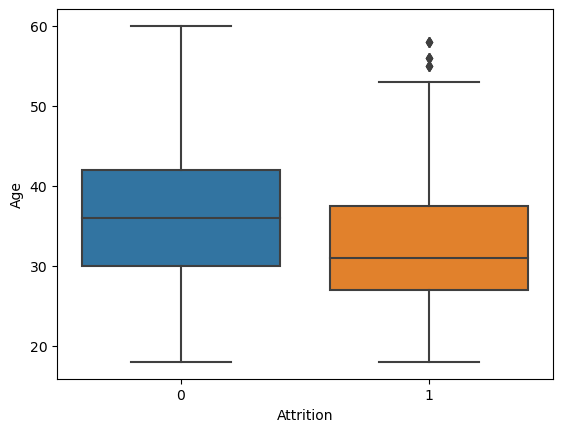

In [744]:
sns.boxplot(x = ibm2["Attrition"], y = ibm2["Age"])

#On average, people that leave the company are younger than those that stay

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

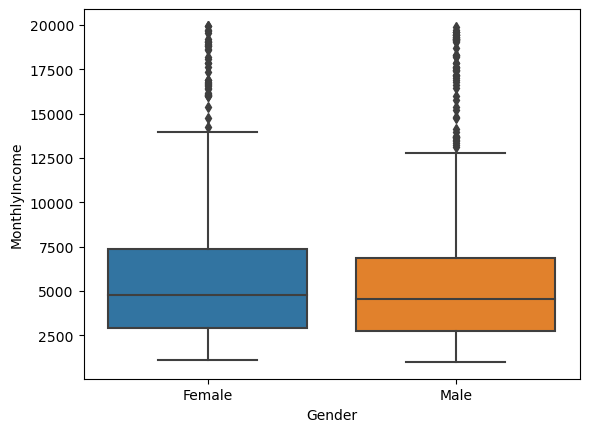

In [734]:
sns.boxplot(x = ibm2["Gender"], y = ibm2["MonthlyIncome"])

#On average, females make more than males

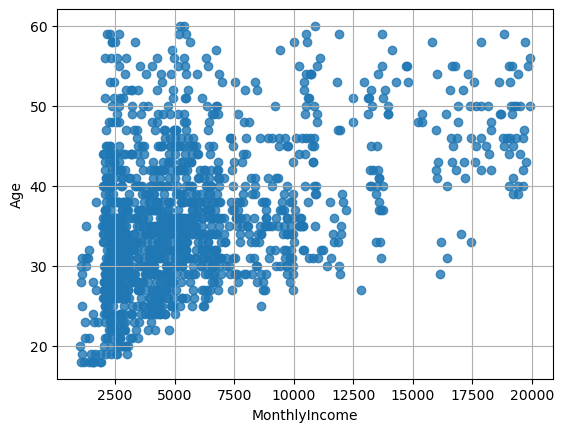

In [740]:
sns.regplot(x = ibm2["MonthlyIncome"], y = ibm2["Age"], fit_reg = False)

plt.grid()

In [ ]:
#I would recommend to HR to:

#1 - Those that left are early carrier/young professionals.
#    The data shows a correlation between how much training the employee received and attrition level
#    Maybe if the company offered more training, the younger professional would be motivitated to stay and reinvest that
#    training in the company.

#2  - Pay younger professionals more. The data also shows that those that left had lower salaries than those that stayed.
#    If newer employees were better compensated, they might be less apt to look for better paying jobs at other companies.

#3 - Adapt a hybrid or remote work models for jobs that are appropriate.
#    The data shows that the farther away employees lived, the more apt they were to leave.
#    People value their commute/outside of work hours time.
#    If they weren't spending time commuting, they might be more apt to be retained.